In [3]:
import numpy as np
import glob,os
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [4]:
resol_cuts = [1.7, 2.2, 2.5, 3.0, 4.0]
wds = [0.0001, 0.01]

protein_to_ranges = {
    "prion": [(0, 3), (10, 16), (40, 50), (65, 75), (86, 89), (95, 103)],
    "lyso": [(7, 12), (14, 17), (18, 25), (37, 48), (49, 56), (57, 77)],
    "abl": [(16, 26), (27, 36), (38, 48), (70, 80), (145, 170), (195, 200)],
}

protein_to_labels = {
    "prion": [
        "N-terminus",
        "Loop",
        "Small Helix",
        "Hinge",
        "Control",
        "C-terminus Helix",
    ],
    "lyso": [
        "Control",
        "Small Beta Sheet",
        "Beta+Loop",
        "Short Helix",
        "Helices Loop",
        "Long Helix",
    ],
    "abl": [
        "Gly Loop",
        "Beta+Loop",
        "Loop Connection",
        "Beta+Loop+Beta",
        "DFG Loop",
        "Control",
    ],
}

## 3hak

In [3]:
paths = glob.glob("./test_cases/3hak/outputs/*wd0.01_*1.70*Feb17*")

In [4]:
paths

['./test_cases/3hak/outputs/3hak_it150_v3_lr0.05+1.0_wd0.01_batch1_subr0.7_solvTrue_scaleTrue_resol_1.70_16.13_rbrlbfgs_150.0_aliB_L21e-11+10.0_Feb172024_dcf0441_B',
 './test_cases/3hak/outputs/3hak_it150_v3_lr0.05+1.0_wd0.01_batch1_subr0.7_solvTrue_scaleTrue_resol_1.70_16.13_rbrlbfgs_150.0_aliB_L21e-11+10.0_Feb172024_dcf0441_A',
 './test_cases/3hak/outputs/3hak_it150_v3_lr0.05+1.0_wd0.01_batch1_subr0.7_solvTrue_scaleTrue_resol_1.70_16.13_rbrlbfgs_150.0_aliB_L21e-11+10.0_Feb172024_dcf0441_C']

In [5]:
MSE_loss_matrix = np.load("{path}/MSE_loss_it.npy".format(path=paths[0]))

In [6]:
roi = [0,2]
system = "prion"

In [7]:
Nterminus = []
helix = []
for path in tqdm(paths):
    MSE_loss_matrix = np.load("{path}/MSE_loss_it.npy".format(path=path))
    Nterm_range_ = protein_to_ranges[system][roi[0]]
    helix_range_ = protein_to_ranges[system][roi[1]]
    Nterminus.append(np.mean(MSE_loss_matrix[:, Nterm_range_[0]:Nterm_range_[1]], axis=1))
    helix.append(np.mean(MSE_loss_matrix[:, helix_range_[0]:helix_range_[1]], axis=1))
Nterminus = np.array(Nterminus)
helix = np.array(helix)

100%|██████████| 3/3 [00:00<00:00, 1749.57it/s]


In [46]:
rfree_it = np.load("{path}/rfree_it.npy".format(path=path))

100%|██████████| 3/3 [00:00<00:00, 844.94it/s]


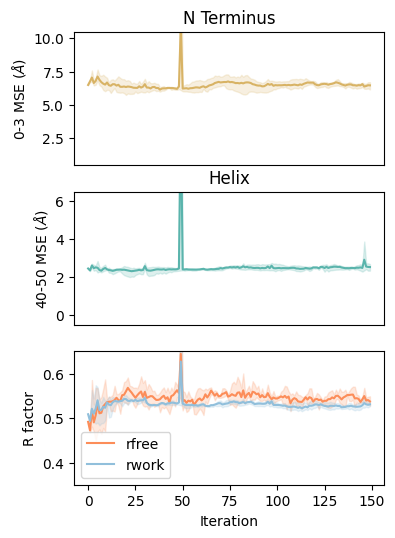

In [68]:
resol_cuts = [1.7, 2.2, 2.5, 3.0, 4.0]
paths = glob.glob(f"./test_cases/3hak/outputs/*wd0.0001*subr0.7*{resol_cuts[4]:.2f}*Feb17*")
Nterminus = []
helix = []
rfree = []
rwork = []
for path in tqdm(paths):
    MSE_loss_matrix = np.load("{path}/MSE_loss_it.npy".format(path=path))
    rfree_it = np.load("{path}/rfree_it.npy".format(path=path))
    rwork_it = np.load("{path}/rwork_it.npy".format(path=path))
    Nterm_range_ = protein_to_ranges[system][roi[0]]
    helix_range_ = protein_to_ranges[system][roi[1]]
    Nterminus.append(np.mean(MSE_loss_matrix[:, Nterm_range_[0]:Nterm_range_[1]], axis=1))
    helix.append(np.mean(MSE_loss_matrix[:, helix_range_[0]:helix_range_[1]], axis=1))
    rfree.append(rfree_it)
    rwork.append(rwork_it)
Nterminus = np.array(Nterminus)
helix = np.array(helix)
rfree = np.array(rfree)
rwork = np.array(rwork)

fig, axs = plt.subplots(nrows=3, ncols=1, figsize=[4,6],dpi=100)
axs[0].plot(np.arange(150), np.mean(Nterminus, axis=0), color="#d8b365")
axs[0].fill_between(np.arange(150), np.min(Nterminus, axis=0), np.max(Nterminus, axis=0), color="#d8b365", alpha=0.2)
axs[0].set_ylabel(r"0-3 MSE ($\AA$)")
axs[0].set_ylim([0.5, 10.5])
axs[0].set_xticks([])
axs[0].set_title("N Terminus")

axs[1].plot(np.arange(150), np.mean(helix, axis=0), color="#5ab4ac")
axs[1].fill_between(np.arange(150), np.min(helix, axis=0), np.max(helix, axis=0), color="#5ab4ac", alpha=0.2)
axs[1].set_ylabel(r"40-50 MSE ($\AA$)")
axs[1].set_xticks([])
axs[1].set_title("Helix")
axs[1].set_ylim([-0.5, 6.5])

axs[2].plot(np.arange(150), np.mean(rfree, axis=0), color="#fc8d59", label="rfree")
axs[2].fill_between(np.arange(150), np.min(rfree, axis=0), np.max(rfree, axis=0), color="#fc8d59", alpha=0.2)
axs[2].plot(np.arange(150), np.mean(rwork, axis=0), color="#91bfdb", label="rwork")
axs[2].fill_between(np.arange(150), np.min(rwork, axis=0), np.max(rwork, axis=0), color="#91bfdb", alpha=0.2)
axs[2].set_ylabel(r"R factor")
axs[2].set_xlabel("Iteration")
axs[2].legend()
axs[2].set_ylim([0.35, 0.65])

plt.show()

## 3pyy

In [13]:
resol_cuts = [2.2, 2.5, 3.0, 4.0]
paths = glob.glob(f"./test_cases/3pyy_short/outputs/*lr0.5+5.0*wd0.01*{resol_cuts[0]:.2f}*L21e-11*Feb17*")

In [12]:
paths

['./test_cases/3pyy_short/outputs/3pyy_short_it150_v3_lr0.5+5.0_wd0.01_batch1_subr1.0_solvTrue_scaleTrue_resol_2.20_29.96_rbrlbfgs_150.0_aliB_L21e-11+10.0_Feb172024_dcf0441_B',
 './test_cases/3pyy_short/outputs/3pyy_short_it150_v3_lr0.5+5.0_wd0.01_batch1_subr1.0_solvTrue_scaleTrue_resol_2.20_29.96_rbrlbfgs_150.0_aliB_L21e-11+10.0_Feb172024_dcf0441_C',
 './test_cases/3pyy_short/outputs/3pyy_short_it150_v3_lr0.5+5.0_wd0.01_batch1_subr1.0_solvTrue_scaleTrue_resol_2.20_29.96_rbrlbfgs_150.0_aliB_L21e-11+10.0_Feb172024_dcf0441_A',
 './test_cases/3pyy_short/outputs/3pyy_short_it150_v3_lr0.5+5.0_wd0.0001_batch1_subr1.0_solvTrue_scaleTrue_resol_2.20_29.96_rbrlbfgs_150.0_aliB_L21e-11+10.0_Feb172024_dcf0441_A',
 './test_cases/3pyy_short/outputs/3pyy_short_it150_v3_lr0.5+5.0_wd0.0001_batch1_subr1.0_solvTrue_scaleTrue_resol_2.20_29.96_rbrlbfgs_150.0_aliB_L21e-11+10.0_Feb172024_dcf0441_B',
 './test_cases/3pyy_short/outputs/3pyy_short_it150_v3_lr0.5+5.0_wd0.0001_batch1_subr1.0_solvTrue_scaleTrue_reso

100%|██████████| 3/3 [00:00<00:00, 803.25it/s]


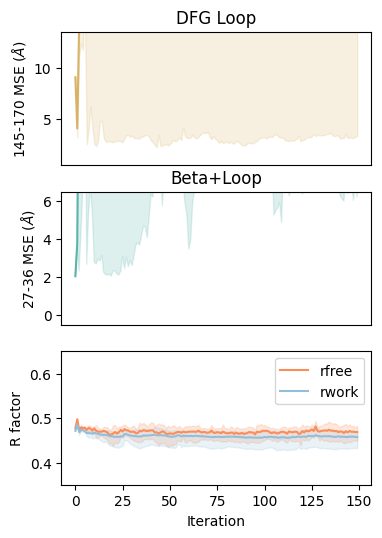

In [27]:
resol_cuts = [2.2, 2.5, 3.0, 4.0]
roi = [4,1]
system = "abl"
paths = glob.glob(f"./test_cases/3pyy_short/outputs/*lr0.5+5.0*wd0.0001*{resol_cuts[3]:.2f}*L21e-11*Feb17*")
DFG = []
Betaloop = []
rfree = []
rwork = []
for path in tqdm(paths):
    MSE_loss_matrix = np.load("{path}/MSE_loss_it.npy".format(path=path))
    rfree_it = np.load("{path}/rfree_it.npy".format(path=path))
    rwork_it = np.load("{path}/rwork_it.npy".format(path=path))
    Nterm_range_ = protein_to_ranges[system][roi[0]]
    helix_range_ = protein_to_ranges[system][roi[1]]
    DFG.append(np.mean(MSE_loss_matrix[:, Nterm_range_[0]:Nterm_range_[1]], axis=1))
    Betaloop.append(np.mean(MSE_loss_matrix[:, helix_range_[0]:helix_range_[1]], axis=1))
    rfree.append(rfree_it)
    rwork.append(rwork_it)
DFG = np.array(DFG)
Betaloop = np.array(Betaloop)
rfree = np.array(rfree)
rwork = np.array(rwork)

fig, axs = plt.subplots(nrows=3, ncols=1, figsize=[4,6],dpi=100)
axs[0].plot(np.arange(150), np.mean(DFG, axis=0), color="#d8b365")
axs[0].fill_between(np.arange(150), np.min(DFG, axis=0), np.max(DFG, axis=0), color="#d8b365", alpha=0.2)
axs[0].set_ylabel(r"145-170 MSE ($\AA$)")
axs[0].set_ylim([0.5, 13.5])
axs[0].set_xticks([])
axs[0].set_title("DFG Loop")

axs[1].plot(np.arange(150), np.mean(Betaloop, axis=0), color="#5ab4ac")
axs[1].fill_between(np.arange(150), np.min(Betaloop, axis=0), np.max(Betaloop, axis=0), color="#5ab4ac", alpha=0.2)
axs[1].set_ylabel(r"27-36 MSE ($\AA$)")
axs[1].set_xticks([])
axs[1].set_title("Beta+Loop")
axs[1].set_ylim([-0.5, 6.5])

axs[2].plot(np.arange(150), np.mean(rfree, axis=0), color="#fc8d59", label="rfree")
axs[2].fill_between(np.arange(150), np.min(rfree, axis=0), np.max(rfree, axis=0), color="#fc8d59", alpha=0.2)
axs[2].plot(np.arange(150), np.mean(rwork, axis=0), color="#91bfdb", label="rwork")
axs[2].fill_between(np.arange(150), np.min(rwork, axis=0), np.max(rwork, axis=0), color="#91bfdb", alpha=0.2)
axs[2].set_ylabel(r"R factor")
axs[2].set_xlabel("Iteration")
axs[2].legend()
axs[2].set_ylim([0.35, 0.65])

plt.show()

### 6npy

In [7]:
paths = glob.glob(f"./test_cases/6npv_short/outputs/*Feb22*")

In [9]:
paths

['./test_cases/6npv_short/outputs/6npv_short_it150_v3_lr0.05+1.0_wd0.0001_batch1_subr0.7_solvTrue_scaleTrue_resol_0.00_41.22_rbrlbfgs_150.0_aliB_L21e-11+10.0_Feb222024_dcf0441_A',
 './test_cases/6npv_short/outputs/6npv_short_it150_v3_lr0.05+1.0_wd0.0001_batch1_subr0.7_solvTrue_scaleTrue_resol_0.00_41.22_rbrlbfgs_150.0_aliB_L21e-11+10.0_Feb222024_dcf0441_C',
 './test_cases/6npv_short/outputs/6npv_short_it150_v3_lr0.05+1.0_wd0.0001_batch1_subr0.7_solvTrue_scaleTrue_resol_3.00_41.22_rbrlbfgs_150.0_aliB_L21e-11+10.0_Feb222024_dcf0441_B',
 './test_cases/6npv_short/outputs/6npv_short_it150_v3_lr0.05+1.0_wd0.0001_batch1_subr0.7_solvTrue_scaleTrue_resol_3.00_41.22_rbrlbfgs_150.0_aliB_L21e-11+10.0_Feb222024_dcf0441_C',
 './test_cases/6npv_short/outputs/6npv_short_it150_v3_lr0.05+1.0_wd0.0001_batch1_subr0.7_solvTrue_scaleTrue_resol_0.00_41.22_rbrlbfgs_150.0_aliB_L21e-11+10.0_Feb222024_dcf0441_B',
 './test_cases/6npv_short/outputs/6npv_short_it150_v3_lr0.05+1.0_wd0.0001_batch1_subr0.7_solvTrue_sc

In [11]:
paths = glob.glob(f"./test_cases/6npv_short/outputs/*lr0.05+1.0*wd0.0001*{resol_cuts[0]:.2f}*L21e-11*Feb22*")

100%|██████████| 3/3 [00:00<00:00, 108.04it/s]


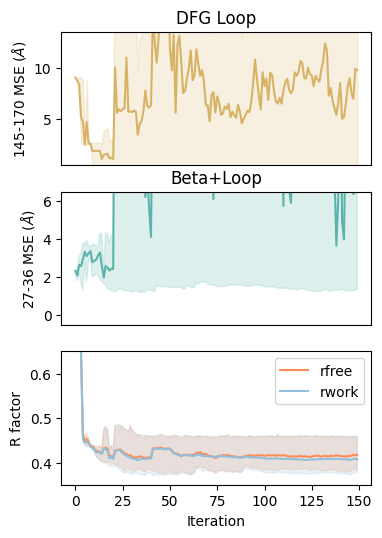

In [14]:
resol_cuts = [0.0, 3.0]
roi = [4,1]
system = "abl"
paths = glob.glob(f"./test_cases/6npv_short/outputs/*lr0.05+1.0*wd0.0001*{resol_cuts[1]:.2f}*L21e-11*Feb22*")
DFG = []
Betaloop = []
rfree = []
rwork = []
for path in tqdm(paths):
    MSE_loss_matrix = np.load("{path}/MSE_loss_it.npy".format(path=path))
    rfree_it = np.load("{path}/rfree_it.npy".format(path=path))
    rwork_it = np.load("{path}/rwork_it.npy".format(path=path))
    Nterm_range_ = protein_to_ranges[system][roi[0]]
    helix_range_ = protein_to_ranges[system][roi[1]]
    DFG.append(np.mean(MSE_loss_matrix[:, Nterm_range_[0]:Nterm_range_[1]], axis=1))
    Betaloop.append(np.mean(MSE_loss_matrix[:, helix_range_[0]:helix_range_[1]], axis=1))
    rfree.append(rfree_it)
    rwork.append(rwork_it)
DFG = np.array(DFG)
Betaloop = np.array(Betaloop)
rfree = np.array(rfree)
rwork = np.array(rwork)

fig, axs = plt.subplots(nrows=3, ncols=1, figsize=[4,6],dpi=100)
axs[0].plot(np.arange(150), np.mean(DFG, axis=0), color="#d8b365")
axs[0].fill_between(np.arange(150), np.min(DFG, axis=0), np.max(DFG, axis=0), color="#d8b365", alpha=0.2)
axs[0].set_ylabel(r"145-170 MSE ($\AA$)")
axs[0].set_ylim([0.5, 13.5])
axs[0].set_xticks([])
axs[0].set_title("DFG Loop")

axs[1].plot(np.arange(150), np.mean(Betaloop, axis=0), color="#5ab4ac")
axs[1].fill_between(np.arange(150), np.min(Betaloop, axis=0), np.max(Betaloop, axis=0), color="#5ab4ac", alpha=0.2)
axs[1].set_ylabel(r"27-36 MSE ($\AA$)")
axs[1].set_xticks([])
axs[1].set_title("Beta+Loop")
axs[1].set_ylim([-0.5, 6.5])

axs[2].plot(np.arange(150), np.mean(rfree, axis=0), color="#fc8d59", label="rfree")
axs[2].fill_between(np.arange(150), np.min(rfree, axis=0), np.max(rfree, axis=0), color="#fc8d59", alpha=0.2)
axs[2].plot(np.arange(150), np.mean(rwork, axis=0), color="#91bfdb", label="rwork")
axs[2].fill_between(np.arange(150), np.min(rwork, axis=0), np.max(rwork, axis=0), color="#91bfdb", alpha=0.2)
axs[2].set_ylabel(r"R factor")
axs[2].set_xlabel("Iteration")
axs[2].legend()
axs[2].set_ylim([0.35, 0.65])

plt.show()